In [25]:
import pandas as pd

data = pd.read_csv("BTP fatigue data.csv")
import seaborn as sns
from sklearn.metrics import r2_score


In [26]:
data.head()

,Set Of Sample,Sample No.,Yield stress (MPa),Ultimate stress (MPa),Elongation(%),Relative density (%),Surface hardness(Hv),Depth of hardness variation (µm),Surface CRS (MPa),Maximum CRS (MPa),Depth of CRS (µm),Surface modification factor,"Surface roughness, Ra(µm)",Stress amplitude(MPa),Fatigue life(Cycle)
0,AB,1,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,60,376456
1,AB,2,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,30,1244634
2,AB,3,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,10,2203568
3,AB,4,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,20,1646240
4,AB,5,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,40,568620


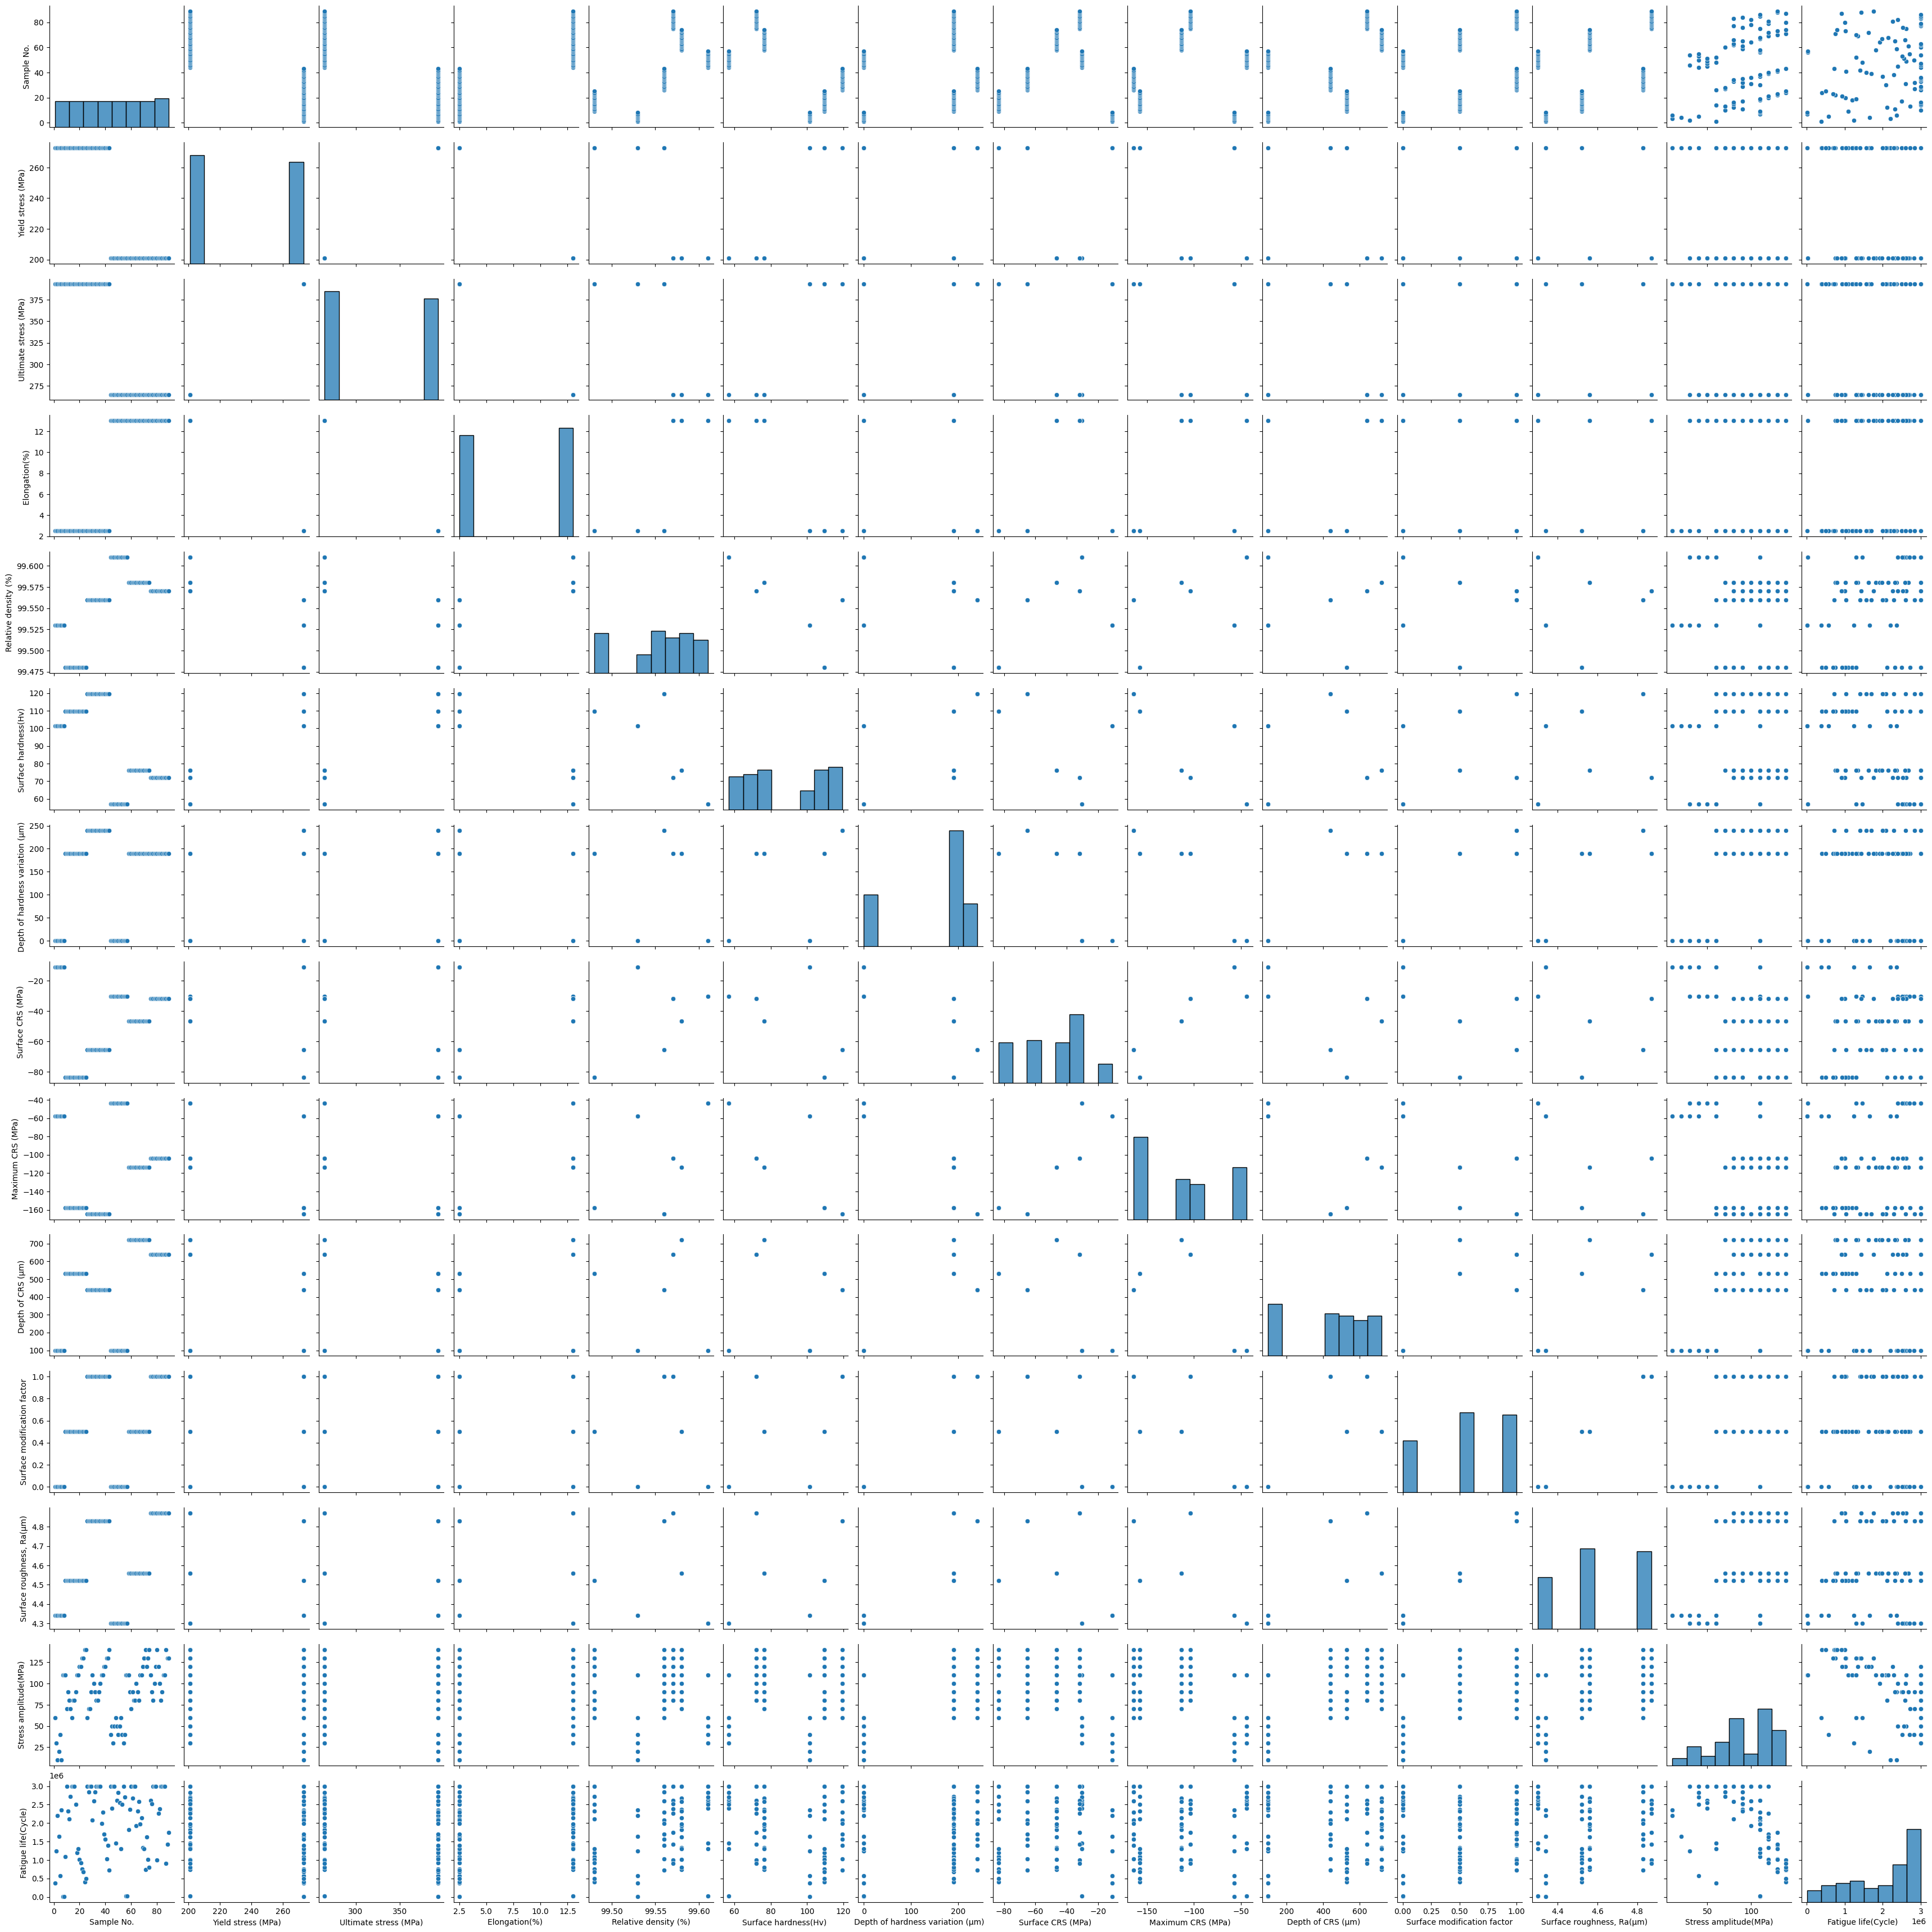

In [3]:
sns.pairplot(data=data)


In [27]:
data_encoded = pd.get_dummies(data, columns=['Set Of Sample'], dtype = int)
data_encoded.head()

,Sample No.,Yield stress (MPa),Ultimate stress (MPa),Elongation(%),Relative density (%),Surface hardness(Hv),Depth of hardness variation (µm),Surface CRS (MPa),Maximum CRS (MPa),Depth of CRS (µm),Surface modification factor,"Surface roughness, Ra(µm)",Stress amplitude(MPa),Fatigue life(Cycle),Set Of Sample_AB,Set Of Sample_AB + HT,Set Of Sample_AB + HT + SP1,Set Of Sample_AB + HT + SP2,Set Of Sample_AB +SP1,Set Of Sample_AB +SP2
0,1,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,60,376456,1,0,0,0,0,0
1,2,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,30,1244634,1,0,0,0,0,0
2,3,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,10,2203568,1,0,0,0,0,0
3,4,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,20,1646240,1,0,0,0,0,0
4,5,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,40,568620,1,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_encoded.drop(columns=['Sample No.', 'Fatigue life(Cycle) '])
y = data_encoded['Fatigue life(Cycle) ']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape

((71, 18), (18, 18))

In [29]:
X

,Yield stress (MPa),Ultimate stress (MPa),Elongation(%),Relative density (%),Surface hardness(Hv),Depth of hardness variation (µm),Surface CRS (MPa),Maximum CRS (MPa),Depth of CRS (µm),Surface modification factor,"Surface roughness, Ra(µm)",Stress amplitude(MPa),Set Of Sample_AB,Set Of Sample_AB + HT,Set Of Sample_AB + HT + SP1,Set Of Sample_AB + HT + SP2,Set Of Sample_AB +SP1,Set Of Sample_AB +SP2
0,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,60,1,0,0,0,0,0
1,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,30,1,0,0,0,0,0
2,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,10,1,0,0,0,0,0
3,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,20,1,0,0,0,0,0
4,273,393,2.5,99.53,101.4,0,-11.0,-57.6,100,0.0,4.34,40,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,201,265,13.0,99.57,72.0,190,-31.7,-103.8,640,1.0,4.87,110,0,0,0,1,0,0
85,201,265,13.0,99.57,72.0,190,-31.7,-103.8,640,1.0,4.87,110,0,0,0,1,0,0
86,201,265,13.0,99.57,72.0,190,-31.7,-103.8,640,1.0,4.87,140,0,0,0,1,0,0
87,201,265,13.0,99.57,72.0,190,-31.7,-103.8,640,1.0,4.87,130,0,0,0,1,0,0


In [30]:
X.columns

Index(['Yield stress (MPa)', 'Ultimate stress (MPa)', 'Elongation(%) ',
       'Relative density (%)', 'Surface hardness(Hv) ',
       'Depth of hardness variation (µm) ', 'Surface CRS (MPa)',
       'Maximum CRS (MPa)', 'Depth of CRS (µm) ',
       'Surface modification factor', 'Surface roughness, Ra(µm)',
       'Stress amplitude(MPa)', 'Set Of Sample_AB', 'Set Of Sample_AB + HT',
       'Set Of Sample_AB + HT + SP1', 'Set Of Sample_AB + HT + SP2',
       'Set Of Sample_AB +SP1', 'Set Of Sample_AB +SP2'],
      dtype='object')

In [31]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=11)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model_rf = RandomForestRegressor(n_estimators=10,max_depth=40)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, n_estimators=10)

In [44]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
print("Training score:",r2_score(y_train,y_pred_train))
print("Testing score :",r2_score(y_test,y_pred_test))

Training score: 0.9655741993147892
Testing score : 0.9272387042065839


In [45]:
import numpy as np

In [46]:
df_train_rf = pd.DataFrame(np.array(y_train),columns=["Actual"])

In [48]:
df_train_rf["Predicted"] = np.array(y_pred_train)

In [50]:
df_train_rf.to_excel(r"D:\rishi\rf_train.xlsx")

In [51]:
df_test_rf = pd.DataFrame(np.array(y_test),columns=["Actual"])
df_test_rf["Predicted"] = np.array(y_pred_test)
df_test_rf.to_excel(r"D:\rishi\rf_test.xlsx")

In [15]:
model_rf.feature_importances_

array([1.43161115e-03, 3.39021463e-05, 6.67413543e-04, 1.33381183e-02,
       7.52052464e-03, 7.28811658e-03, 8.44749065e-02, 2.18389311e-02,
       1.91312940e-02, 1.25441689e-02, 1.47465100e-01, 6.44976561e-01,
       3.59940462e-02, 6.48100459e-04, 9.33435125e-04, 1.94422315e-04,
       6.33830672e-04, 8.85517277e-04])

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=10, max_depth=40)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_ = r2_score(y_train, rf.predict(X_train))

mse, r2, r2_

(73367320561.5561, 0.9050962070845896, 0.9560428556463241)

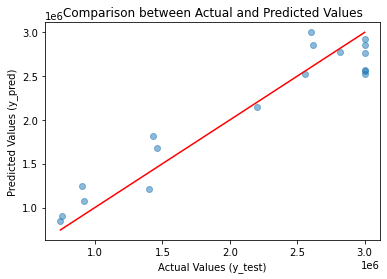

In [17]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Comparison between Actual and Predicted Values')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Perfect prediction line
plt.show()
#plt.save


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
model_dt = DecisionTreeRegressor(min_samples_split=5)
model_dt.fit(X_train, y_train)
y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
print("Training score:",r2_score(y_train,y_pred_train))
print("Testing score :",r2_score(y_test,y_pred_test))

Training score: 0.95512457692139
Testing score : 0.9260025831177459


In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
model_knn = KNeighborsRegressor(n_neighbors=1)
model_knn.fit(X_train, y_train)
y_pred_train = model_knn.predict(X_train)
y_pred_test = model_knn.predict(X_test)
print("Training score:",r2_score(y_train,y_pred_train))
print("Testing score :",r2_score(y_test,y_pred_test))

Training score: 0.9412011061500523
Testing score : 0.8971431525731972


In [22]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.3/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 0.4/99.8 MB 3.4 MB/s eta 0:00:29
   ---------------------------------------- 0.6/99.8 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.7/99.8 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.8/99.8 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 1.0/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 1.2/99.8 MB 3.2 MB/s eta 0:00:31
    --------------------------------------- 1.3/99.8 MB 3.3 MB/s eta 0:00:31
    --------------------------------------- 1.5/99.8 MB 3.2 MB/s eta 0:00:31
    --------------------------------------- 1.6/99.8 MB 3.2 MB/s eta 0:00:31
    --------------------------------------- 1.8/99.8 MB 3.3 MB/s eta 0:00:30
    --

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
model_gbr=GradientBoostingRegressor(n_estimators = 80)
model_gbr.fit(X_train, y_train)
y_pred_train = model_gbr.predict(X_train)
y_pred_test = model_gbr.predict(X_test)
print("Training score:",r2_score(y_train,y_pred_train))
print("Testing score :",r2_score(y_test,y_pred_test))

Training score: 0.9673658133219362
Testing score : 0.9349357859684426


In [24]:
import xgboost
model_xg=xgboost.XGBRegressor(n_estimators = 15)
model_xg.fit(X_train, y_train)
y_pred_train = model_xg.predict(X_train)
y_pred_test = model_xg.predict(X_test)
print("Training score:",r2_score(y_train,y_pred_train))
print("Testing score :",r2_score(y_test,y_pred_test))

Training score: 0.9727420156199494
Testing score : 0.933360596280903
